In [1]:
import pandas as pd
import nltk

# Unduh NLTK
nltk.download('punkt')

# Baca data dari file CSV
try:
    df = pd.read_csv('scrapped_data.csv')
    print(df.head())  
except Exception as e:
    print(f"Error saat membaca file: {e}")


                                             content  Layanan  Transaksi  \
0  Mohon di pertahankan layanannya, yang awalnya ...        1          0   
1  Masa buat transfer gk bisa, di suruh cek saldo...        0         -1   
2  Kenapa aplikasinya tidak bisa dibuka padahal w...        0          0   
3  Lama banget kalo kirim uang dari e commerce, k...       -1         -1   
4  Kenapa sudah gak bisa dibuka BSI mobile nya? P...        0          0   

   Performa Aplikasi  Keamanan  
0                  0        -1  
1                  0         0  
2                 -1         0  
3                  0         0  
4                 -1         0  


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
content=df

# 1. Preprocessing

## a. Cleaning Text

In [3]:
import pandas as pd
import re

# Fungsi membersihkan teks
def clean_text(text):
    text = re.sub(r'[¬≤¬≥¬π‚Å∞‚Å¥‚Åµ‚Å∂‚Å∑‚Å∏‚Åπ]', '', text)  # Menghapus angka pangkat/superscript
    text = re.sub(r'\d+', '', text)           # Menghapus angka biasa
    text = re.sub(r'[^\w\s]', ' ', text)      # Mengganti tanda baca dengan spasi
    text = re.sub(r'\s+', ' ', text)          # Menghapus spasi berlebih
    text = text.strip()                       # Menghapus spasi di awal dan akhir
    return text

In [4]:
# Terapkan fungsi clean_text ke kolom 'content'
content['cleaned_content'] = df['content'].apply(clean_text)
df = content['cleaned_content']

In [5]:
content.head(10)

content  Layanan  Transaksi  \
0  Mohon di pertahankan layanannya, yang awalnya ...        1          0   
1  Masa buat transfer gk bisa, di suruh cek saldo...        0         -1   
2  Kenapa aplikasinya tidak bisa dibuka padahal w...        0          0   
3  Lama banget kalo kirim uang dari e commerce, k...       -1         -1   
4  Kenapa sudah gak bisa dibuka BSI mobile nya? P...        0          0   
5  Apaan ni apk..meng aktifkan nya sangat ribet s...       -1          0   
6  Kenapa ya kak habis saat membuat kata sandi me...        0          0   
7  perbaiki lagi BSI mobile. Kadang gk mau bisa m...        0          0   
8  Aplikasi bank paling jelek dan ga jelas..beli ...        0         -1   
9  Ini kenapa yaa saya transaksi pembayaran wifi ...       -1         -1   

   Performa Aplikasi  Keamanan  \
0                  0        -1   
1                  0         0   
2                 -1         0   
3                  0         0   
4                 -1         0   
5                 -1         0   
6                 -1         0   
7                 -1         0   
8                 -1         0   
9                  0         0   

                                     cleaned_content  
0  Mohon di pertahankan layanannya yang awalnya k...  
1  Masa buat transfer gk bisa di suruh cek saldo ...  
2  Kenapa aplikasinya tidak bisa dibuka padahal w...  
3  Lama banget kalo kirim uang dari e commerce ka...  
4  Kenapa sudah gak bisa dibuka BSI mobile nya Pa...  
5  Apaan ni apk meng aktifkan nya sangat ribet se...  
6  Kenapa ya kak habis saat membuat kata sandi me...  
7  perbaiki lagi BSI mobile Kadang gk mau bisa ma...  
8  Aplikasi bank paling jelek dan ga jelas beli t...  
9  Ini kenapa yaa saya transaksi pembayaran wifi ...

## b. Case Folding

In [6]:
# Fungsi case folding
def case_folding(text):
    return text.lower()

# Terapkan ke kolom hasil cleaning
content['folded'] = content['cleaned_content'].apply(case_folding)
df = content['folded']

In [7]:
content.head(10)

content  Layanan  Transaksi  \
0  Mohon di pertahankan layanannya, yang awalnya ...        1          0   
1  Masa buat transfer gk bisa, di suruh cek saldo...        0         -1   
2  Kenapa aplikasinya tidak bisa dibuka padahal w...        0          0   
3  Lama banget kalo kirim uang dari e commerce, k...       -1         -1   
4  Kenapa sudah gak bisa dibuka BSI mobile nya? P...        0          0   
5  Apaan ni apk..meng aktifkan nya sangat ribet s...       -1          0   
6  Kenapa ya kak habis saat membuat kata sandi me...        0          0   
7  perbaiki lagi BSI mobile. Kadang gk mau bisa m...        0          0   
8  Aplikasi bank paling jelek dan ga jelas..beli ...        0         -1   
9  Ini kenapa yaa saya transaksi pembayaran wifi ...       -1         -1   

   Performa Aplikasi  Keamanan  \
0                  0        -1   
1                  0         0   
2                 -1         0   
3                  0         0   
4                 -1         0   
5                 -1         0   
6                 -1         0   
7                 -1         0   
8                 -1         0   
9                  0         0   

                                     cleaned_content  \
0  Mohon di pertahankan layanannya yang awalnya k...   
1  Masa buat transfer gk bisa di suruh cek saldo ...   
2  Kenapa aplikasinya tidak bisa dibuka padahal w...   
3  Lama banget kalo kirim uang dari e commerce ka...   
4  Kenapa sudah gak bisa dibuka BSI mobile nya Pa...   
5  Apaan ni apk meng aktifkan nya sangat ribet se...   
6  Kenapa ya kak habis saat membuat kata sandi me...   
7  perbaiki lagi BSI mobile Kadang gk mau bisa ma...   
8  Aplikasi bank paling jelek dan ga jelas beli t...   
9  Ini kenapa yaa saya transaksi pembayaran wifi ...   

                                              folded  
0  mohon di pertahankan layanannya yang awalnya k...  
1  masa buat transfer gk bisa di suruh cek saldo ...  
2  kenapa aplikasinya tidak bisa dibuka padahal w...  
3  lama banget kalo kirim uang dari e commerce ka...  
4  kenapa sudah gak bisa dibuka bsi mobile nya pa...  
5  apaan ni apk meng aktifkan nya sangat ribet se...  
6  kenapa ya kak habis saat membuat kata sandi me...  
7  perbaiki lagi bsi mobile kadang gk mau bisa ma...  
8  aplikasi bank paling jelek dan ga jelas beli t...  
9  ini kenapa yaa saya transaksi pembayaran wifi ...

## c. Tokenizing

In [8]:
from nltk.tokenize import word_tokenize

# Tokenisasi
content['tokens'] = content['folded'].apply(word_tokenize)

In [9]:
content

content  Layanan  Transaksi  \
0     Mohon di pertahankan layanannya, yang awalnya ...        1          0   
1     Masa buat transfer gk bisa, di suruh cek saldo...        0         -1   
2     Kenapa aplikasinya tidak bisa dibuka padahal w...        0          0   
3     Lama banget kalo kirim uang dari e commerce, k...       -1         -1   
4     Kenapa sudah gak bisa dibuka BSI mobile nya? P...        0          0   
...                                                 ...      ...        ...   
1721  Sangat disayangkan. Di HP sy RAM 3GB aplikasi ...        0          0   
1722  Aplikasinya susah banget, ribet, kebanyakan ma...        0         -1   
1723  Sudah berbulan2 kalo transfer dari rekening BS...        0         -1   
1724  Sampai saat ini blum bisa digunakan aplikasi i...        0         -1   
1725  [TOLONG DIPERBAIKI] Entah bug atau bukan, pros...        0          0   

      Performa Aplikasi  Keamanan  \
0                     0        -1   
1                     0         0   
2                    -1         0   
3                     0         0   
4                    -1         0   
...                 ...       ...   
1721                 -1         0   
1722                 -1        -1   
1723                  0         0   
1724                 -1         0   
1725                 -1         0   

                                        cleaned_content  \
0     Mohon di pertahankan layanannya yang awalnya k...   
1     Masa buat transfer gk bisa di suruh cek saldo ...   
2     Kenapa aplikasinya tidak bisa dibuka padahal w...   
3     Lama banget kalo kirim uang dari e commerce ka...   
4     Kenapa sudah gak bisa dibuka BSI mobile nya Pa...   
...                                                 ...   
1721  Sangat disayangkan Di HP sy RAM GB aplikasi in...   
1722  Aplikasinya susah banget ribet kebanyakan masu...   
1723  Sudah berbulan kalo transfer dari rekening BSM...   
1724  Sampai saat ini blum bisa digunakan aplikasi i...   
1725  TOLONG DIPERBAIKI Entah bug atau bukan proses ...   

                                                 folded  \
0     mohon di pertahankan layanannya yang awalnya k...   
1     masa buat transfer gk bisa di suruh cek saldo ...   
2     kenapa aplikasinya tidak bisa dibuka padahal w...   
3     lama banget kalo kirim uang dari e commerce ka...   
4     kenapa sudah gak bisa dibuka bsi mobile nya pa...   
...                                                 ...   
1721  sangat disayangkan di hp sy ram gb aplikasi in...   
1722  aplikasinya susah banget ribet kebanyakan masu...   
1723  sudah berbulan kalo transfer dari rekening bsm...   
1724  sampai saat ini blum bisa digunakan aplikasi i...   
1725  tolong diperbaiki entah bug atau bukan proses ...   

                                                 tokens  
0     [mohon, di, pertahankan, layanannya, yang, awa...  
1     [masa, buat, transfer, gk, bisa, di, suruh, ce...  
2     [kenapa, aplikasinya, tidak, bisa, dibuka, pad...  
3     [lama, banget, kalo, kirim, uang, dari, e, com...  
4     [kenapa, sudah, gak, bisa, dibuka, bsi, mobile...  
...                                                 ...  
1721  [sangat, disayangkan, di, hp, sy, ram, gb, apl...  
1722  [aplikasinya, susah, banget, ribet, kebanyakan...  
1723  [sudah, berbulan, kalo, transfer, dari, rekeni...  
1724  [sampai, saat, ini, blum, bisa, digunakan, apl...  
1725  [tolong, diperbaiki, entah, bug, atau, bukan, ...  

[1726 rows x 8 columns]

In [10]:
df=content['tokens']

## c. Normalisasi

In [11]:
normalized_word = pd.read_csv("normalisasi.csv", encoding='latin1')

normalized_word_dict={}
for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1]
def normalized_term(document) :
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

content['normalisasi'] = content['tokens'].apply(normalized_term)
content.head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_15352\2817477570.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalized_word_dict:
C:\Users\HP\AppData\Local\Temp\ipykernel_15352\2817477570.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalized_word_dict[row[0]] = row[1]


content  Layanan  Transaksi  \
0  Mohon di pertahankan layanannya, yang awalnya ...        1          0   
1  Masa buat transfer gk bisa, di suruh cek saldo...        0         -1   
2  Kenapa aplikasinya tidak bisa dibuka padahal w...        0          0   
3  Lama banget kalo kirim uang dari e commerce, k...       -1         -1   
4  Kenapa sudah gak bisa dibuka BSI mobile nya? P...        0          0   
5  Apaan ni apk..meng aktifkan nya sangat ribet s...       -1          0   
6  Kenapa ya kak habis saat membuat kata sandi me...        0          0   
7  perbaiki lagi BSI mobile. Kadang gk mau bisa m...        0          0   
8  Aplikasi bank paling jelek dan ga jelas..beli ...        0         -1   
9  Ini kenapa yaa saya transaksi pembayaran wifi ...       -1         -1   

   Performa Aplikasi  Keamanan  \
0                  0        -1   
1                  0         0   
2                 -1         0   
3                  0         0   
4                 -1         0   
5                 -1         0   
6                 -1         0   
7                 -1         0   
8                 -1         0   
9                  0         0   

                                     cleaned_content  \
0  Mohon di pertahankan layanannya yang awalnya k...   
1  Masa buat transfer gk bisa di suruh cek saldo ...   
2  Kenapa aplikasinya tidak bisa dibuka padahal w...   
3  Lama banget kalo kirim uang dari e commerce ka...   
4  Kenapa sudah gak bisa dibuka BSI mobile nya Pa...   
5  Apaan ni apk meng aktifkan nya sangat ribet se...   
6  Kenapa ya kak habis saat membuat kata sandi me...   
7  perbaiki lagi BSI mobile Kadang gk mau bisa ma...   
8  Aplikasi bank paling jelek dan ga jelas beli t...   
9  Ini kenapa yaa saya transaksi pembayaran wifi ...   

                                              folded  \
0  mohon di pertahankan layanannya yang awalnya k...   
1  masa buat transfer gk bisa di suruh cek saldo ...   
2  kenapa aplikasinya tidak bisa dibuka padahal w...   
3  lama banget kalo kirim uang dari e commerce ka...   
4  kenapa sudah gak bisa dibuka bsi mobile nya pa...   
5  apaan ni apk meng aktifkan nya sangat ribet se...   
6  kenapa ya kak habis saat membuat kata sandi me...   
7  perbaiki lagi bsi mobile kadang gk mau bisa ma...   
8  aplikasi bank paling jelek dan ga jelas beli t...   
9  ini kenapa yaa saya transaksi pembayaran wifi ...   

                                              tokens  \
0  [mohon, di, pertahankan, layanannya, yang, awa...   
1  [masa, buat, transfer, gk, bisa, di, suruh, ce...   
2  [kenapa, aplikasinya, tidak, bisa, dibuka, pad...   
3  [lama, banget, kalo, kirim, uang, dari, e, com...   
4  [kenapa, sudah, gak, bisa, dibuka, bsi, mobile...   
5  [apaan, ni, apk, meng, aktifkan, nya, sangat, ...   
6  [kenapa, ya, kak, habis, saat, membuat, kata, ...   
7  [perbaiki, lagi, bsi, mobile, kadang, gk, mau,...   
8  [aplikasi, bank, paling, jelek, dan, ga, jelas...   
9  [ini, kenapa, yaa, saya, transaksi, pembayaran...   

                                         normalisasi  
0  [mohon, di, pertahankan, layanannya, yang, awa...  
1  [masa, buat, transfer, tidak, bisa, di, suruh,...  
2  [kenapa, aplikasinya, tidak, bisa, dibuka, pad...  
3  [lama, sekali, kalau, kirim, uang, dari, e, co...  
4  [kenapa, sudah, tidak, bisa, dibuka, bsi, mobi...  
5  [apa, ini, aplikasi, meng, aktifkan, nya, sang...  
6  [kenapa, iya, kak, setelah, saat, membuat, kat...  
7  [perbaiki, lagi, bsi, mobile, kadang, tidak, m...  
8  [aplikasi, bank, paling, jelek, dan, tidak, je...  
9  [ini, kenapa, iya, saya, transaksi, pembayaran...

In [12]:
df=content['normalisasi']

In [13]:
#content.to_excel('steamming.xlsx', index=False)
#content[['content','cleaned_content','folded','tokens', 'normalisasi']].to_excel('data_bersih.xlsx', index=False)

## d. Convert Negasi

In [14]:
import pandas as pd
import ast 

# Daftar kata negasi umum
negations = ['tidak', 'gak', 'nggak', 'never']

# Fungsi untuk menangani negasi dalam daftar token
def handle_negation(tokens):
    processed_tokens = []
    is_negation = False
    
    for token in tokens:
        if token in negations:
            is_negation = True
        else:
            if is_negation:
                processed_tokens.append(f"tidak_{token}")  # Format penambahan negasi
                is_negation = False
            else:
                processed_tokens.append(token)
    
    if is_negation:  # Jika akhir kalimat adalah negasi
        processed_tokens.append("tidak")
    
    return processed_tokens

# Pastikan kolom 'normalisasi' sudah berbentuk list
content['normalisasi'] = content['normalisasi'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Terapkan fungsi negasi
content['convert_negasi'] = content['normalisasi'].apply(handle_negation)

content.head(10)

content  Layanan  Transaksi  \
0  Mohon di pertahankan layanannya, yang awalnya ...        1          0   
1  Masa buat transfer gk bisa, di suruh cek saldo...        0         -1   
2  Kenapa aplikasinya tidak bisa dibuka padahal w...        0          0   
3  Lama banget kalo kirim uang dari e commerce, k...       -1         -1   
4  Kenapa sudah gak bisa dibuka BSI mobile nya? P...        0          0   
5  Apaan ni apk..meng aktifkan nya sangat ribet s...       -1          0   
6  Kenapa ya kak habis saat membuat kata sandi me...        0          0   
7  perbaiki lagi BSI mobile. Kadang gk mau bisa m...        0          0   
8  Aplikasi bank paling jelek dan ga jelas..beli ...        0         -1   
9  Ini kenapa yaa saya transaksi pembayaran wifi ...       -1         -1   

   Performa Aplikasi  Keamanan  \
0                  0        -1   
1                  0         0   
2                 -1         0   
3                  0         0   
4                 -1         0   
5                 -1         0   
6                 -1         0   
7                 -1         0   
8                 -1         0   
9                  0         0   

                                     cleaned_content  \
0  Mohon di pertahankan layanannya yang awalnya k...   
1  Masa buat transfer gk bisa di suruh cek saldo ...   
2  Kenapa aplikasinya tidak bisa dibuka padahal w...   
3  Lama banget kalo kirim uang dari e commerce ka...   
4  Kenapa sudah gak bisa dibuka BSI mobile nya Pa...   
5  Apaan ni apk meng aktifkan nya sangat ribet se...   
6  Kenapa ya kak habis saat membuat kata sandi me...   
7  perbaiki lagi BSI mobile Kadang gk mau bisa ma...   
8  Aplikasi bank paling jelek dan ga jelas beli t...   
9  Ini kenapa yaa saya transaksi pembayaran wifi ...   

                                              folded  \
0  mohon di pertahankan layanannya yang awalnya k...   
1  masa buat transfer gk bisa di suruh cek saldo ...   
2  kenapa aplikasinya tidak bisa dibuka padahal w...   
3  lama banget kalo kirim uang dari e commerce ka...   
4  kenapa sudah gak bisa dibuka bsi mobile nya pa...   
5  apaan ni apk meng aktifkan nya sangat ribet se...   
6  kenapa ya kak habis saat membuat kata sandi me...   
7  perbaiki lagi bsi mobile kadang gk mau bisa ma...   
8  aplikasi bank paling jelek dan ga jelas beli t...   
9  ini kenapa yaa saya transaksi pembayaran wifi ...   

                                              tokens  \
0  [mohon, di, pertahankan, layanannya, yang, awa...   
1  [masa, buat, transfer, gk, bisa, di, suruh, ce...   
2  [kenapa, aplikasinya, tidak, bisa, dibuka, pad...   
3  [lama, banget, kalo, kirim, uang, dari, e, com...   
4  [kenapa, sudah, gak, bisa, dibuka, bsi, mobile...   
5  [apaan, ni, apk, meng, aktifkan, nya, sangat, ...   
6  [kenapa, ya, kak, habis, saat, membuat, kata, ...   
7  [perbaiki, lagi, bsi, mobile, kadang, gk, mau,...   
8  [aplikasi, bank, paling, jelek, dan, ga, jelas...   
9  [ini, kenapa, yaa, saya, transaksi, pembayaran...   

                                         normalisasi  \
0  [mohon, di, pertahankan, layanannya, yang, awa...   
1  [masa, buat, transfer, tidak, bisa, di, suruh,...   
2  [kenapa, aplikasinya, tidak, bisa, dibuka, pad...   
3  [lama, sekali, kalau, kirim, uang, dari, e, co...   
4  [kenapa, sudah, tidak, bisa, dibuka, bsi, mobi...   
5  [apa, ini, aplikasi, meng, aktifkan, nya, sang...   
6  [kenapa, iya, kak, setelah, saat, membuat, kat...   
7  [perbaiki, lagi, bsi, mobile, kadang, tidak, m...   
8  [aplikasi, bank, paling, jelek, dan, tidak, je...   
9  [ini, kenapa, iya, saya, transaksi, pembayaran...   

                                      convert_negasi  
0  [mohon, di, pertahankan, layanannya, yang, awa...  
1  [masa, buat, transfer, tidak_bisa, di, suruh, ...  
2  [kenapa, aplikasinya, tidak_bisa, dibuka, pada...  
3  [lama, sekali, kalau, kirim, uang, dari, e, co...  
4  [kenapa, sudah, tidak_bisa, dibuka, bsi, mobil...  
5  [apa, ini, aplikasi, meng, aktif

In [15]:
df=content['convert_negasi']

## e. Stopwords


In [16]:
from nltk.corpus import stopwords
import nltk

# Unduh stopwords untuk bahasa Indonesia
nltk.download('stopwords')

# Ambil stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

# Membaca stopwords tambahan dari file 'combined_stop_words.txt'
with open('combined_stop_words.txt', 'r') as f:
    additional_stopwords = [line.strip() for line in f.readlines()]

# Gabungkan stopwords dengan kata-kata tambahan
stop_words.update(additional_stopwords)

# Fungsi untuk menghapus stopwords dari token
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Terapkan fungsi remove_stopwords
content['filtered_tokens'] = content['convert_negasi'].apply(remove_stopwords)

content.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


content  Layanan  Transaksi  \
0  Mohon di pertahankan layanannya, yang awalnya ...        1          0   
1  Masa buat transfer gk bisa, di suruh cek saldo...        0         -1   
2  Kenapa aplikasinya tidak bisa dibuka padahal w...        0          0   
3  Lama banget kalo kirim uang dari e commerce, k...       -1         -1   
4  Kenapa sudah gak bisa dibuka BSI mobile nya? P...        0          0   
5  Apaan ni apk..meng aktifkan nya sangat ribet s...       -1          0   
6  Kenapa ya kak habis saat membuat kata sandi me...        0          0   
7  perbaiki lagi BSI mobile. Kadang gk mau bisa m...        0          0   
8  Aplikasi bank paling jelek dan ga jelas..beli ...        0         -1   
9  Ini kenapa yaa saya transaksi pembayaran wifi ...       -1         -1   

   Performa Aplikasi  Keamanan  \
0                  0        -1   
1                  0         0   
2                 -1         0   
3                  0         0   
4                 -1         0   
5                 -1         0   
6                 -1         0   
7                 -1         0   
8                 -1         0   
9                  0         0   

                                     cleaned_content  \
0  Mohon di pertahankan layanannya yang awalnya k...   
1  Masa buat transfer gk bisa di suruh cek saldo ...   
2  Kenapa aplikasinya tidak bisa dibuka padahal w...   
3  Lama banget kalo kirim uang dari e commerce ka...   
4  Kenapa sudah gak bisa dibuka BSI mobile nya Pa...   
5  Apaan ni apk meng aktifkan nya sangat ribet se...   
6  Kenapa ya kak habis saat membuat kata sandi me...   
7  perbaiki lagi BSI mobile Kadang gk mau bisa ma...   
8  Aplikasi bank paling jelek dan ga jelas beli t...   
9  Ini kenapa yaa saya transaksi pembayaran wifi ...   

                                              folded  \
0  mohon di pertahankan layanannya yang awalnya k...   
1  masa buat transfer gk bisa di suruh cek saldo ...   
2  kenapa aplikasinya tidak bisa dibuka padahal w...   
3  lama banget kalo kirim uang dari e commerce ka...   
4  kenapa sudah gak bisa dibuka bsi mobile nya pa...   
5  apaan ni apk meng aktifkan nya sangat ribet se...   
6  kenapa ya kak habis saat membuat kata sandi me...   
7  perbaiki lagi bsi mobile kadang gk mau bisa ma...   
8  aplikasi bank paling jelek dan ga jelas beli t...   
9  ini kenapa yaa saya transaksi pembayaran wifi ...   

                                              tokens  \
0  [mohon, di, pertahankan, layanannya, yang, awa...   
1  [masa, buat, transfer, gk, bisa, di, suruh, ce...   
2  [kenapa, aplikasinya, tidak, bisa, dibuka, pad...   
3  [lama, banget, kalo, kirim, uang, dari, e, com...   
4  [kenapa, sudah, gak, bisa, dibuka, bsi, mobile...   
5  [apaan, ni, apk, meng, aktifkan, nya, sangat, ...   
6  [kenapa, ya, kak, habis, saat, membuat, kata, ...   
7  [perbaiki, lagi, bsi, mobile, kadang, gk, mau,...   
8  [aplikasi, bank, paling, jelek, dan, ga, jelas...   
9  [ini, kenapa, yaa, saya, transaksi, pembayaran...   

                                         normalisasi  \
0  [mohon, di, pertahankan, layanannya, yang, awa...   
1  [masa, buat, transfer, tidak, bisa, di, suruh,...   
2  [kenapa, aplikasinya, tidak, bisa, dibuka, pad...   
3  [lama, sekali, kalau, kirim, uang, dari, e, co...   
4  [kenapa, sudah, tidak, bisa, dibuka, bsi, mobi...   
5  [apa, ini, aplikasi, meng, aktifkan, nya, sang...   
6  [kenapa, iya, kak, setelah, saat, membuat, kat...   
7  [perbaiki, lagi, bsi, mobile, kadang, tidak, m...   
8  [aplikasi, bank, paling, jelek, dan, tidak, je...   
9  [ini, kenapa, iya, saya, transaksi, pembayaran...   

                                      convert_negasi  \
0  [mohon, di, pertahankan, layanannya, yang, awa...   
1  [masa, buat, transfer, tidak_bisa, di, suruh, ...   
2  [kenapa, aplikasinya, tidak_bisa, dibuka, pada...   
3  [lama, sekali, kalau, kirim, uang, dari, e, co...   
4  [kenapa, sudah, tidak_bisa, dibuka, bsi, mobil...   
5  [apa, ini, aplikasi, meng,

## f. Stemming

In [17]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk stemming token dengan pengecekan "_"
def stem_tokens(tokens):
    stemmed = []
    for word in tokens:
        if "_" in word: 
            stemmed.append(word)
        else:
            stemmed.append(stemmer.stem(word))
    return stemmed

# Terapkan ke kolom
content['stemmed_tokens'] = content['filtered_tokens'].apply(stem_tokens)
content.head(10)

content  Layanan  Transaksi  \
0  Mohon di pertahankan layanannya, yang awalnya ...        1          0   
1  Masa buat transfer gk bisa, di suruh cek saldo...        0         -1   
2  Kenapa aplikasinya tidak bisa dibuka padahal w...        0          0   
3  Lama banget kalo kirim uang dari e commerce, k...       -1         -1   
4  Kenapa sudah gak bisa dibuka BSI mobile nya? P...        0          0   
5  Apaan ni apk..meng aktifkan nya sangat ribet s...       -1          0   
6  Kenapa ya kak habis saat membuat kata sandi me...        0          0   
7  perbaiki lagi BSI mobile. Kadang gk mau bisa m...        0          0   
8  Aplikasi bank paling jelek dan ga jelas..beli ...        0         -1   
9  Ini kenapa yaa saya transaksi pembayaran wifi ...       -1         -1   

   Performa Aplikasi  Keamanan  \
0                  0        -1   
1                  0         0   
2                 -1         0   
3                  0         0   
4                 -1         0   
5                 -1         0   
6                 -1         0   
7                 -1         0   
8                 -1         0   
9                  0         0   

                                     cleaned_content  \
0  Mohon di pertahankan layanannya yang awalnya k...   
1  Masa buat transfer gk bisa di suruh cek saldo ...   
2  Kenapa aplikasinya tidak bisa dibuka padahal w...   
3  Lama banget kalo kirim uang dari e commerce ka...   
4  Kenapa sudah gak bisa dibuka BSI mobile nya Pa...   
5  Apaan ni apk meng aktifkan nya sangat ribet se...   
6  Kenapa ya kak habis saat membuat kata sandi me...   
7  perbaiki lagi BSI mobile Kadang gk mau bisa ma...   
8  Aplikasi bank paling jelek dan ga jelas beli t...   
9  Ini kenapa yaa saya transaksi pembayaran wifi ...   

                                              folded  \
0  mohon di pertahankan layanannya yang awalnya k...   
1  masa buat transfer gk bisa di suruh cek saldo ...   
2  kenapa aplikasinya tidak bisa dibuka padahal w...   
3  lama banget kalo kirim uang dari e commerce ka...   
4  kenapa sudah gak bisa dibuka bsi mobile nya pa...   
5  apaan ni apk meng aktifkan nya sangat ribet se...   
6  kenapa ya kak habis saat membuat kata sandi me...   
7  perbaiki lagi bsi mobile kadang gk mau bisa ma...   
8  aplikasi bank paling jelek dan ga jelas beli t...   
9  ini kenapa yaa saya transaksi pembayaran wifi ...   

                                              tokens  \
0  [mohon, di, pertahankan, layanannya, yang, awa...   
1  [masa, buat, transfer, gk, bisa, di, suruh, ce...   
2  [kenapa, aplikasinya, tidak, bisa, dibuka, pad...   
3  [lama, banget, kalo, kirim, uang, dari, e, com...   
4  [kenapa, sudah, gak, bisa, dibuka, bsi, mobile...   
5  [apaan, ni, apk, meng, aktifkan, nya, sangat, ...   
6  [kenapa, ya, kak, habis, saat, membuat, kata, ...   
7  [perbaiki, lagi, bsi, mobile, kadang, gk, mau,...   
8  [aplikasi, bank, paling, jelek, dan, ga, jelas...   
9  [ini, kenapa, yaa, saya, transaksi, pembayaran...   

                                         normalisasi  \
0  [mohon, di, pertahankan, layanannya, yang, awa...   
1  [masa, buat, transfer, tidak, bisa, di, suruh,...   
2  [kenapa, aplikasinya, tidak, bisa, dibuka, pad...   
3  [lama, sekali, kalau, kirim, uang, dari, e, co...   
4  [kenapa, sudah, tidak, bisa, dibuka, bsi, mobi...   
5  [apa, ini, aplikasi, meng, aktifkan, nya, sang...   
6  [kenapa, iya, kak, setelah, saat, membuat, kat...   
7  [perbaiki, lagi, bsi, mobile, kadang, tidak, m...   
8  [aplikasi, bank, paling, jelek, dan, tidak, je...   
9  [ini, kenapa, iya, saya, transaksi, pembayaran...   

                                      convert_negasi  \
0  [mohon, di, pertahankan, layanannya, yang, awa...   
1  [masa, buat, transfer, tidak_bisa, di, suruh, ...   
2  [kenapa, aplikasinya, tidak_bisa, dibuka, pada...   
3  [lama, sekali, kalau, kirim, uang, dari, e, co...   
4  [kenapa, sudah, tidak_bisa, dibuka, bsi, mobil...   
5  [apa, ini, aplikasi, meng,

In [18]:
# Gabungkan token menjadi string
content['processed_text'] = content['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens))

In [19]:
#content.to_excel('steamming.xlsx', index=False)
#content[['content','cleaned_content','folded','tokens', 'normalisasi','normalized_with_negation','filtered_tokens','stemmed_tokens','processed_text']].to_excel('data_bersih.xlsx', index=False)

## Word Cloud

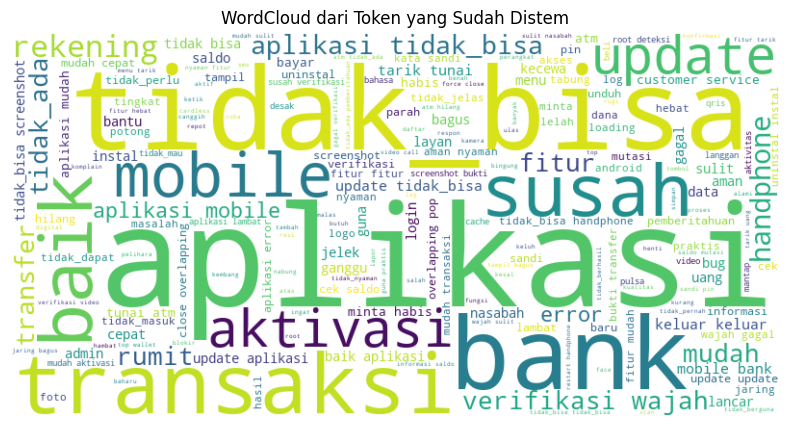

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua token yang telah distem menjadi satu string besar
all_stemmed_text = content['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens)).str.cat(sep=' ')

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_stemmed_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Token yang Sudah Distem')
plt.show()


# 2. Split Dataset

In [21]:
from sklearn.model_selection import train_test_split

aspek_columns = ['Layanan', 'Transaksi', 'Performa Aplikasi', 'Keamanan']
aspek_columns = [col for col in aspek_columns if col in content.columns]

X = content['processed_text']
y = content[aspek_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Latih: {len(X_train)}, Uji: {len(X_test)}')
print("Kolom y_train:", y_train.columns.tolist())
print(y_train.head())

Latih: 1208, Uji: 518
Kolom y_train: ['Layanan', 'Transaksi', 'Performa Aplikasi', 'Keamanan']
      Layanan  Transaksi  Performa Aplikasi  Keamanan
1712        1          0                  1         0
1177        0          0                 -1         0
585         0         -1                 -1         0
1550       -1         -1                 -1         0
727         0         -1                 -1         0


# 3. Ekstraksi Fitur

In [22]:
import math
from collections import Counter
import pandas as pd
import joblib 

# Tokenisasi dokumen
tokenized_docs_train = [doc.split() for doc in X_train]
tokenized_docs_test = [doc.split() for doc in X_test]

# Menggabungkan semua kata unik dari dokumen latih
all_words = list(set(word for doc in tokenized_docs_train for word in doc))

#Simpan all_words ke file
joblib.dump(all_words, 'tfidf_all_words.joblib')

# Menghitung Document Frequency (DF)
df = {word: sum(1 for doc in tokenized_docs_train if word in doc) for word in all_words}

# Menghitung Inverse Document Frequency (IDF)
num_documents = len(tokenized_docs_train)
idf = {word: math.log10(num_documents / df[word]) for word in all_words}

# Menghitung TF dan TF-IDF
def compute_tf_idf(documents, idf_values, all_words):
    tf_idf_results = []
    for doc in documents:
        tf = Counter(doc)
        tf_idf_result = {
            word: tf[word] * idf_values[word] if word in tf else 0
            for word in all_words
        }
        tf_idf_results.append(tf_idf_result)
    return tf_idf_results

# Hitung TF-IDF untuk data latih dan uji
tf_idf_results_train = compute_tf_idf(tokenized_docs_train, idf, all_words)
tf_idf_results_test = compute_tf_idf(tokenized_docs_test, idf, all_words)

# Membuat DataFrame
tfidf_df_train = pd.DataFrame(tf_idf_results_train, columns=all_words)
tfidf_df_test = pd.DataFrame(tf_idf_results_test, columns=all_words)

# Mengisi nilai kosong dengan 0
tfidf_df_train.fillna(0, inplace=True)
tfidf_df_test.fillna(0, inplace=True)

# Validasi hasil
print("TF-IDF Data Train Shape:", tfidf_df_train.shape)
print("TF-IDF Data Test Shape:", tfidf_df_test.shape)

TF-IDF Data Train Shape: (1208, 536)
TF-IDF Data Test Shape: (518, 536)


In [23]:
# Simpan hasil TF-IDF ke file Excel
#tfidf_df_train.to_excel("tfidf_train.xlsx", index=False)
#tfidf_df_test.to_excel("tfidf_test.xlsx", index=False)

# 4. SMOTE

In [24]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import joblib

all_words = joblib.load('tfidf_all_words.joblib')

# Pastikan tfidf_df_train memiliki urutan kolom sesuai all_words
tfidf_df_train = tfidf_df_train[all_words]

# Dictionary hasil SMOTE
X_train_smote_dict, y_train_smote_dict = {}, {}

# Proses SMOTE untuk setiap aspek
for aspect in ['Layanan', 'Transaksi', 'Performa Aplikasi', 'Keamanan']:
    y_train_aspect = y_train[aspect]

    # Validasi jumlah baris cocok
    if tfidf_df_train.shape[0] != y_train.shape[0]:
        raise ValueError("Jumlah baris tidak cocok antara X_train dan y_train")

    # Pastikan label lebih dari satu kelas agar SMOTE bisa dijalankan
    if len(y_train_aspect.unique()) > 1:
        smote = SMOTE(random_state=42)
        X_smote, y_smote = smote.fit_resample(tfidf_df_train, y_train_aspect)
        print(f"‚úÖ SMOTE berhasil untuk {aspect}: {dict(pd.Series(y_smote).value_counts())}")
    else:
        X_smote, y_smote = tfidf_df_train.copy(), y_train_aspect.copy()
        print(f"‚ö† Aspek '{aspect}' hanya memiliki satu kelas. SMOTE dilewati.")

    # Simpan hasil ke dictionary
    X_train_smote_dict[aspect] = pd.DataFrame(X_smote, columns=all_words)
    y_train_smote_dict[aspect] = pd.Series(y_smote, name=aspect)


‚úÖ SMOTE berhasil untuk Layanan: {1: 840, 0: 840, -1: 840}
‚úÖ SMOTE berhasil untuk Transaksi: {0: 789, -1: 789, 1: 789}
‚úÖ SMOTE berhasil untuk Performa Aplikasi: {1: 922, -1: 922, 0: 922}
‚úÖ SMOTE berhasil untuk Keamanan: {0: 948, -1: 948, 1: 948}


# 5. SVM Modeling

In [25]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import classification_report
import numpy as np
import joblib

# Grid untuk hyperparameter tuning
param_grid = [
    {
        'svm__estimator__kernel': ['linear'],
        'svm__estimator__C': [0.01, 0.1, 1, 10, 100],
    },
    {
        'svm__estimator__kernel': ['rbf'],
        'svm__estimator__C': [0.01, 0.1, 1, 10, 100],
        'svm__estimator__gamma': [0.001, 0.01, 0.1, 1, 10]
    },
    {
        'svm__estimator__kernel': ['poly'],
        'svm__estimator__C': [0.01, 0.1, 1, 10, 100],
        'svm__estimator__gamma': [0.001, 0.01, 0.1, 1, 10],
        'svm__estimator__degree': [2, 3]
    }
]

# ‚öô Pelatihan model dengan 10-Fold Cross Validation untuk setiap aspek
for aspect in ['Layanan', 'Transaksi', 'Performa Aplikasi', 'Keamanan']:
    print(f"\nüìå Hyperparameter tuning SVM OvO dengan 10-Fold untuk aspek: {aspect}")

    # Ambil data hasil SMOTE untuk aspek terkait
    X_smote = np.array(X_train_smote_dict[aspect])
    y_smote = np.array(y_train_smote_dict[aspect])

    # Buat pipeline SVM dengan One-vs-One
    pipeline = Pipeline([
        ('svm', OneVsOneClassifier(SVC(random_state=42)))
    ])

    # GridSearchCV dengan 10-fold cross-validation
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=10,  
        scoring='f1_weighted',
        verbose=2,
        n_jobs=-1
    )

    # Fit model dan cari parameter terbaik
    grid_search.fit(X_smote, y_smote)

    # Evaluasi model terbaik dengan prediksi silang menggunakan 10-fold
    best_model = grid_search.best_estimator_
    y_pred_cv = cross_val_predict(best_model, X_smote, y_smote, cv=10) 

    print(f"\n‚úÖ Model terbaik untuk aspek {aspect}:")
    print("Best Params:", grid_search.best_params_)
    print("üìä Evaluasi 10-Fold:")
    print(classification_report(y_smote, y_pred_cv))

    # Simpan model terbaik
    joblib.dump(best_model, f"svm_model_{aspect}_tuned_k10fold_smote_ovo.joblib")


üìå Hyperparameter tuning SVM OvO dengan 10-Fold untuk aspek: Layanan
Fitting 10 folds for each of 80 candidates, totalling 800 fits

‚úÖ Model terbaik untuk aspek Layanan:
Best Params: {'svm__estimator__C': 100, 'svm__estimator__gamma': 0.1, 'svm__estimator__kernel': 'rbf'}
üìä Evaluasi 10-Fold:
              precision    recall  f1-score   support

          -1       0.92      0.90      0.91       840
           0       0.90      0.91      0.90       840
           1       0.99      1.00      0.99       840

    accuracy                           0.94      2520
   macro avg       0.94      0.94      0.94      2520
weighted avg       0.94      0.94      0.94      2520


üìå Hyperparameter tuning SVM OvO dengan 10-Fold untuk aspek: Transaksi
Fitting 10 folds for each of 80 candidates, totalling 800 fits

‚úÖ Model terbaik untuk aspek Transaksi:
Best Params: {'svm__estimator__C': 10, 'svm__estimator__gamma': 0.01, 'svm__estimator__kernel': 'rbf'}
üìä Evaluasi 10-Fold:
             


=== ROC / AUC untuk aspek: Layanan ===


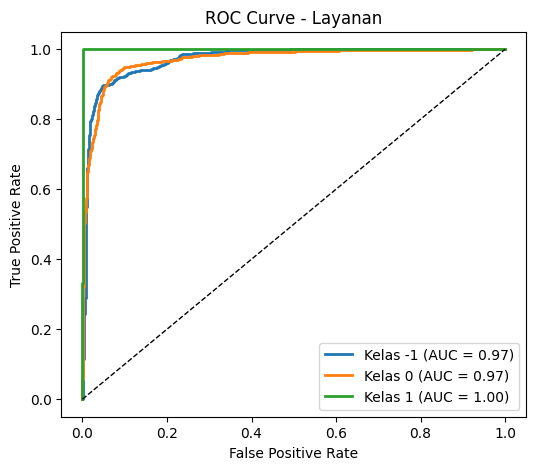

AUC untuk kelas -1: 0.972
AUC untuk kelas 0: 0.971
AUC untuk kelas 1: 0.999

=== ROC / AUC untuk aspek: Transaksi ===


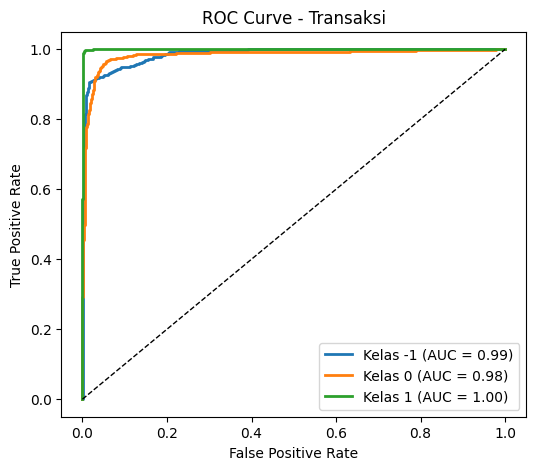

AUC untuk kelas -1: 0.985
AUC untuk kelas 0: 0.984
AUC untuk kelas 1: 1.000

=== ROC / AUC untuk aspek: Performa Aplikasi ===


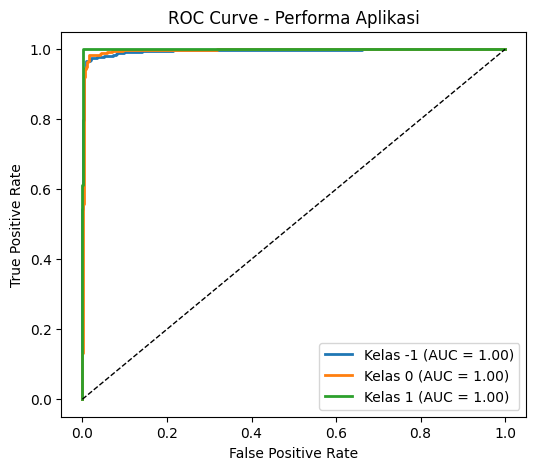

AUC untuk kelas -1: 0.995
AUC untuk kelas 0: 0.996
AUC untuk kelas 1: 1.000

=== ROC / AUC untuk aspek: Keamanan ===


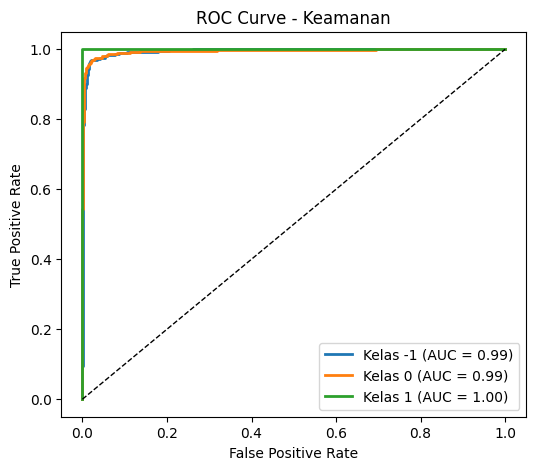

AUC untuk kelas -1: 0.994
AUC untuk kelas 0: 0.995
AUC untuk kelas 1: 1.000


In [27]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Loop per aspek
for aspect in ['Layanan', 'Transaksi', 'Performa Aplikasi', 'Keamanan']:
    print(f"\n=== ROC / AUC untuk aspek: {aspect} ===")

    # Ambil data SMOTE untuk aspek ini
    X_smote = np.array(X_train_smote_dict[aspect])
    y_smote = np.array(y_train_smote_dict[aspect])

    classes = np.unique(y_smote)
    n_classes = len(classes)

    # Binarisasi label untuk multi-class ROC
    y_bin = label_binarize(y_smote, classes=classes)

    # Prediksi skor dengan cross_val_predict (pakai decision_function, bukan predict_proba)
    y_score = cross_val_predict(
        Pipeline([
            ('svm', OneVsOneClassifier(SVC(
                C=10,
                gamma=0.1,
                kernel='rbf',
                probability=True,  
                random_state=42
            )))
        ]),
        X_smote, y_smote, cv=10, n_jobs=-1, method="decision_function"
    )

    # Hitung ROC dan AUC untuk tiap kelas
    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC Curve
    plt.figure(figsize=(6, 5))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2,
                 label=f"Kelas {classes[i]} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {aspect}")
    plt.legend(loc="lower right")
    plt.show()

    # Cetak nilai AUC tiap kelas
    for i in range(n_classes):
        print(f"AUC untuk kelas {classes[i]}: {roc_auc[i]:.3f}")

# 7. Klasifikasi SVM

In [28]:
import joblib
import numpy as np
from sklearn.metrics import classification_report

# Daftar aspek
aspects = ['Layanan', 'Transaksi', 'Performa Aplikasi', 'Keamanan']

# Sinkronisasi index TF-IDF dan label uji
tfidf_df_test = tfidf_df_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Konversi TF-IDF test ke array numpy
X_test_np = tfidf_df_test.to_numpy()

# Dictionary untuk menyimpan hasil
predictions = {}

for aspect in aspects:
    print(f"\nüìå Melakukan prediksi untuk aspek: {aspect}")

    # Muat model terbaik hasil training
    model_path = f"svm_model_{aspect}_tuned_k10fold_smote_ovo.joblib"
    try:
        model = joblib.load(model_path)
    except FileNotFoundError:
        print(f"‚ùå Model untuk aspek {aspect} tidak ditemukan di: {model_path}")
        continue

    # Ambil label y_test untuk aspek ini
    y_test_aspect_full = y_test[aspect]
    valid_idx = ~y_test_aspect_full.isna()

    X_test_aspect = X_test_np[valid_idx]
    y_test_aspect = y_test_aspect_full[valid_idx].to_numpy()

    # Prediksi data uji
    y_pred = model.predict(X_test_aspect)

    # Skor decision_function (untuk ROC/AUC)
    try:
        y_score = model.decision_function(X_test_aspect)
    except AttributeError:
        y_score = None  

    # Simpan hasil prediksi
    predictions[aspect] = {
        'y_true': y_test_aspect,
        'y_pred': y_pred,
        'y_score': y_score
    }


üìå Melakukan prediksi untuk aspek: Layanan

üìå Melakukan prediksi untuk aspek: Transaksi

üìå Melakukan prediksi untuk aspek: Performa Aplikasi

üìå Melakukan prediksi untuk aspek: Keamanan


# 8. Evaluasi Akhir


üìå Evaluasi aspek: Layanan
üîπ Akurasi: 66.60%
              precision    recall  f1-score   support

          -1       0.42      0.24      0.30       135
           0       0.71      0.87      0.78       351
           1       0.67      0.19      0.29        32

    accuracy                           0.67       518
   macro avg       0.60      0.43      0.46       518
weighted avg       0.63      0.67      0.63       518



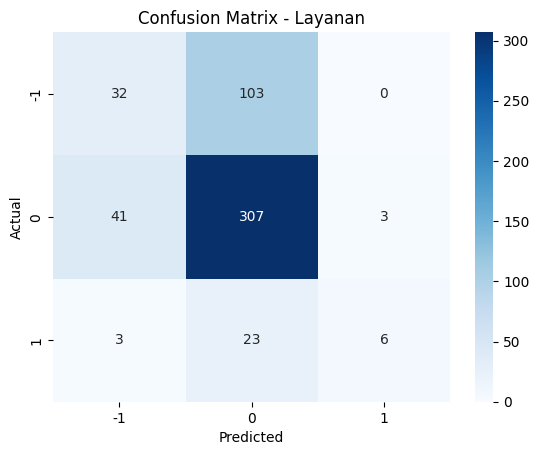


üìå Evaluasi aspek: Transaksi
üîπ Akurasi: 88.22%
              precision    recall  f1-score   support

          -1       0.81      0.84      0.82       130
           0       0.93      0.93      0.93       347
           1       0.73      0.59      0.65        41

    accuracy                           0.88       518
   macro avg       0.82      0.79      0.80       518
weighted avg       0.88      0.88      0.88       518



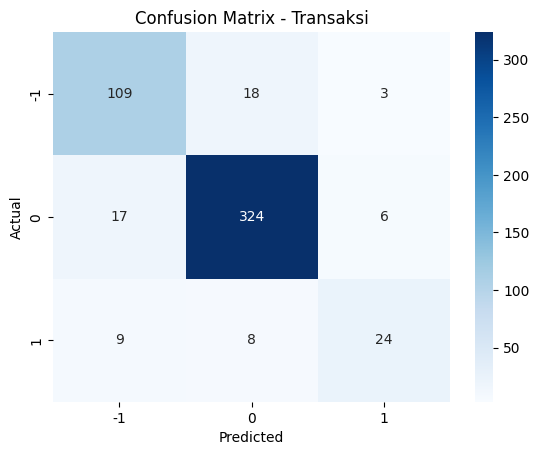


üìå Evaluasi aspek: Performa Aplikasi
üîπ Akurasi: 77.03%
              precision    recall  f1-score   support

          -1       0.78      0.96      0.86       371
           0       0.67      0.31      0.43        99
           1       0.76      0.27      0.40        48

    accuracy                           0.77       518
   macro avg       0.74      0.51      0.56       518
weighted avg       0.76      0.77      0.73       518



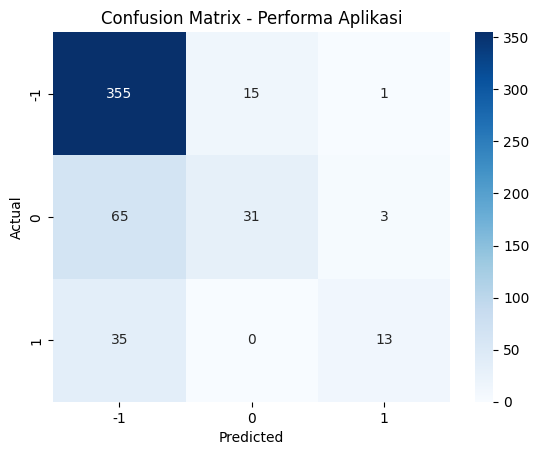


üìå Evaluasi aspek: Keamanan
üîπ Akurasi: 81.08%
              precision    recall  f1-score   support

          -1       0.78      0.39      0.52       121
           0       0.81      0.97      0.88       382
           1       1.00      0.20      0.33        15

    accuracy                           0.81       518
   macro avg       0.87      0.52      0.58       518
weighted avg       0.81      0.81      0.78       518



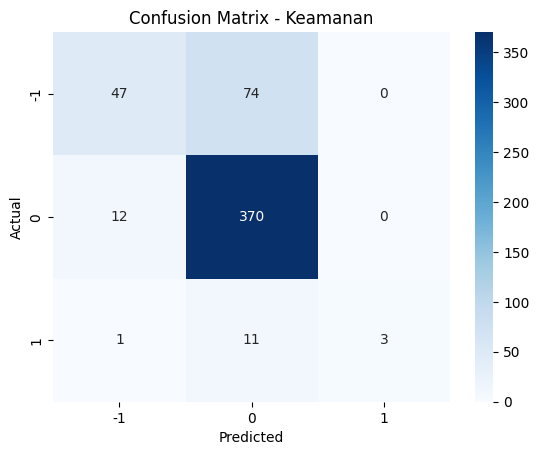

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = [-1, 0, 1]  # Label kelas

# Evaluasi dan visualisasi untuk setiap aspek
for aspect in predictions:
    print(f"\nüìå Evaluasi aspek: {aspect}")

    y_true = predictions[aspect]['y_true']
    y_pred = predictions[aspect]['y_pred']

    # Akurasi
    acc = accuracy_score(y_true, y_pred) * 100
    print(f"üîπ Akurasi: {acc:.2f}%")

    # Classification report
    print(classification_report(y_true, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {aspect}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()